### Model Building

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report,confusion_matrix

In [4]:
# Read the dataset
data = pd.read_csv(r"/content/drive/MyDrive/data_syn1.csv")

In [5]:
# SMOTE balancing technique is applied
from imblearn.over_sampling import SMOTE
# Importing test_train_split from sklearn library
from sklearn.model_selection import train_test_split

# get the predictors and target variable from dataset
X = data.drop('readmitted', axis=1)
y = data['readmitted']
oversample = SMOTE()

# Splitting the data into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=101)
X_train, y_train = oversample.fit_resample(X_train, y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/externals/six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.neighbors.base module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.neighbors. Anything that cannot be imported from sklearn.neighbors is now part of the private API.
  warnings.warn(message, FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


In [6]:
# Random Forest

# Let's first fit a random forest model with default hyperparameters.
# Importing random forest classifier from sklearn library
from sklearn.ensemble import RandomForestClassifier
# Importing classification report and confusion matrix from sklearn metrics
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

In [8]:


# Running the random forest with default parameters.
rfc = RandomForestClassifier()

In [9]:
# fit the model
rfc.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [ ]:
# predict
predictions = rfc.predict(X_test)

In [ ]:
# Printing confusion matrix
print(confusion_matrix(y_test,predictions))

In [ ]:
print(accuracy_score(y_test,predictions))

In [ ]:
# Let's check the report of our default model
print(classification_report(y_test,predictions))

### Hyperparameter tuning

In [10]:
# Now lets tune the hyperparameters - max_depth
# GridSearchCV to find optimal max_depth
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV


# specify number of folds for k-fold CV
n_folds = 5

# parameters to build the model on
parameters = {'max_depth': range(2, 20, 5)}

# instantiate the model
rf = RandomForestClassifier()


# fit tree on training data
rf = GridSearchCV(rf, parameters, 
                  cv=n_folds, 
                  scoring="accuracy",
                  return_train_score=True)
rf.fit(X_train, y_train)

GridSearchCV(cv=5, error_score=nan,
             estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                              class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              max_samples=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=100, n_jobs=None,
                                              oob_score=False,
                                              rando

In [11]:
# scores of GridSearch CV
scores = rf.cv_results_
pd.DataFrame(scores).head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_depth,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,2.914771,0.047422,0.119926,0.001300,2,{'max_depth': 2},0.635176,0.713254,0.710738,0.703827,0.750132,0.702625,0.037381,4,0.733011,0.696457,0.694803,0.683180,0.718313,0.705153,0.017971
1,6.525828,0.170427,0.185460,0.003241,7,{'max_depth': 7},0.670238,0.863688,0.872535,0.870866,0.879875,0.831440,0.080765,3,0.892214,0.821724,0.826634,0.824404,0.828076,0.838610,0.026888
2,8.864611,0.136747,0.284710,0.013429,12,{'max_depth': 12},0.679003,0.955523,0.956497,0.957591,0.960026,0.901728,0.111372,2,0.961691,0.899184,0.899255,0.899043,0.899510,0.911737,0.024977
3,10.690184,0.140502,0.367412,0.005836,17,{'max_depth': 17},0.684117,0.982712,0.982225,0.982955,0.982549,0.922912,0.119398,1,0.988343,0.936672,0.936834,0.937159,0.936044,0.947010,0.020669


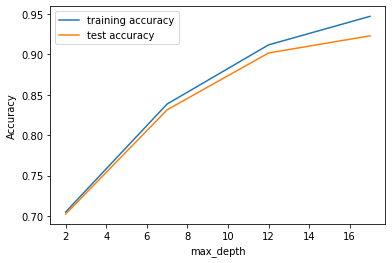

In [14]:
# plotting accuracies with max_depth
plt.figure()
plt.plot(scores["param_max_depth"], 
         scores["mean_train_score"], 
         label="training accuracy")
plt.plot(scores["param_max_depth"], 
         scores["mean_test_score"], 
         label="test accuracy")
plt.xlabel("max_depth")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

In [22]:
# GridSearchCV to find optimal features

# specify number of folds for k-fold CV
n_folds = 5

# parameters to build the model on
parameters = {'max_features': [4, 8, 14, 20]}

# instantiate the model (note we are specifying a max_depth)
rf = RandomForestClassifier(max_depth=10)

# fit tree on training data
rf = GridSearchCV(rf, parameters, 
                  cv=n_folds, 
                  scoring="accuracy",
                  return_train_score=True)
rf.fit(X_train, y_train)

GridSearchCV(cv=5, error_score=nan,
             estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                              class_weight=None,
                                              criterion='gini', max_depth=10,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              max_samples=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=100, n_jobs=None,
                                              oob_score=False,
                                              random_

In [23]:
# scores of GridSearch CV
scores = rf.cv_results_
pd.DataFrame(scores).head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_features,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,8.206507,0.174291,0.235932,0.005214,4,{'max_features': 4},0.677745,0.930647,0.936166,0.932105,0.939735,0.883280,0.102816,1,0.938965,0.877656,0.880760,0.877231,0.880051,0.890932,0.024054
1,13.495112,0.274841,0.228042,0.006904,8,{'max_features': 8},0.672632,0.928131,0.930728,0.934662,0.936285,0.880488,0.103967,3,0.934278,0.874023,0.874805,0.874390,0.876176,0.886734,0.023783
2,20.585179,0.354770,0.225164,0.007767,14,{'max_features': 14},0.668046,0.928496,0.935273,0.939369,0.942007,0.882638,0.107393,2,0.931893,0.872715,0.875850,0.876490,0.877718,0.886933,0.022541
3,27.412362,0.382444,0.215408,0.007837,20,{'max_features': 20},0.665733,0.909748,0.932351,0.919159,0.907877,0.866974,0.100993,4,0.921717,0.857547,0.871761,0.856981,0.848205,0.871242,0.026343


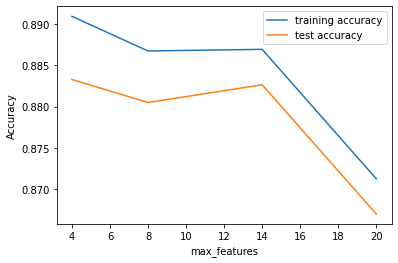

In [24]:
# plotting accuracies for max_features
plt.figure()
plt.plot(scores["param_max_features"], 
         scores["mean_train_score"], 
         label="training accuracy")
plt.plot(scores["param_max_features"], 
         scores["mean_test_score"], 
         label="test accuracy")
plt.xlabel("max_features")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

In [1]:
from sklearn.model_selection import RandomizedSearchCV

In [7]:
# specify number of folds for k-fold CV
n_folds = 5

# parameters to build the model on
param_grid = {'max_features': [4, 8, 14, 20],
             'n_estimators': range(100, 1500, 400),
             'max_depth': range(2, 20, 5),
             'min_samples_leaf': range(100, 400, 50),
             'min_samples_split': range(200, 500, 50),
             }
# instantiate the model 
rf = RandomForestClassifier()


# fit tree on training data
rf = RandomizedSearchCV(rf, param_grid, 
                  cv=n_folds, 
                  scoring="accuracy",
                  return_train_score=True,
                  n_jobs = -1,verbose = 1)
rf.fit(X_train, y_train)

best_parameters = rf.best_params_
print(best_parameters)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  46 tasks      | elapsed: 48.2min
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed: 49.3min finished


{'n_estimators': 900, 'min_samples_split': 300, 'min_samples_leaf': 150, 'max_features': 8, 'max_depth': 17}


In [8]:
scores = rf.cv_results_
pd.DataFrame(scores).head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_n_estimators,param_min_samples_split,param_min_samples_leaf,param_max_features,param_max_depth,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,26.643810,0.619177,0.271975,0.006877,100,300,150,14,7,"{'n_estimators': 100, 'min_samples_split': 300...",0.655872,0.873062,0.873103,0.868836,0.882066,0.830588,0.087465,5,0.864345,0.821328,0.824544,0.822050,0.826230,0.831699,0.016417
1,35.548984,0.957034,0.262047,0.008883,100,400,150,20,7,"{'n_estimators': 100, 'min_samples_split': 400...",0.646863,0.857804,0.858128,0.847936,0.845867,0.811320,0.082380,7,0.843394,0.807520,0.808342,0.801008,0.796484,0.811350,0.016604
2,33.595762,0.682318,0.343782,0.013329,100,200,200,14,12,"{'n_estimators': 100, 'min_samples_split': 200...",0.662811,0.916078,0.917012,0.914086,0.923461,0.866690,0.101988,2,0.914524,0.860215,0.860114,0.858350,0.862905,0.871222,0.021700
3,159.898452,2.894765,2.417262,0.024872,900,250,100,8,7,"{'n_estimators': 900, 'min_samples_split': 250...",0.662933,0.883370,0.876999,0.872530,0.883162,0.835799,0.086528,4,0.879309,0.832346,0.828227,0.827924,0.829649,0.839491,0.019970
4,43.423126,0.391893,1.677385,0.017524,900,250,300,4,2,"{'n_estimators': 900, 'min_samples_split': 250...",0.634283,0.708303,0.718448,0.703462,0.715555,0.696010,0.031313,8,0.716474,0.692044,0.696254,0.688486,0.692717,0.697195,0.009950


In [9]:
# predict
# predictions = rf.predict(X_test)
best_parameters = rf.best_params_
print(best_parameters)

{'n_estimators': 900, 'min_samples_split': 300, 'min_samples_leaf': 150, 'max_features': 8, 'max_depth': 17}


In [10]:
# evaluation metrics
# print(classification_report(y_test,predictions))